### IMPORT LIBRARIES

In [1]:
import pandas as pd
import os
import sys
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import gensim
import spacy
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="tensorflow")

# Disable specific warnings in TensorFlow
import tensorflow as tf
tf.get_logger().setLevel('ERROR')
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


In [ ]:
## LOAD THE FILE

In [2]:
# First, read the CSV file using pandas
true_data = pd.read_csv("C:/users/882834/OneDrive - hull.ac.uk/Desktop/applied ai/True.csv", encoding="latin1", on_bad_lines="skip")
display(true_data.head())

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [3]:
# First, read the CSV file using pandas
fake_data = pd.read_csv("C:/users/882834/OneDrive - hull.ac.uk/Desktop/applied ai/Fake.csv", encoding="latin1", on_bad_lines="skip")
display(fake_data.head())

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Yearâ...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obamaâs Na...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
fake_data["class"] = 0
true_data["class"] = 1

In [5]:
true_data.shape, fake_data.shape

((21417, 5), (23481, 5))

In [6]:
# Combine the datasets
news_df = pd.concat([fake_data, true_data], axis=0, ignore_index=True)
news_df.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Yearâ...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obamaâs Na...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [7]:
news_df.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [8]:
df = news_df.drop(["title", "subject","date"], axis = 1)

In [9]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [10]:
df.head()

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [11]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\882834\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\882834\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
#import nltk
#nltk.download()

### Text Preprocessing

A custom `preprocess_text` function was applied to clean the text data. This function converts text to lowercase, removes URLs, mentions, hashtags, digits, and punctuation, tokenizes the text, removes stop words, and applies lemmatization. The cleaned text was stored in a new column `text_cleaned`.


In [14]:
def preprocess_text(text):
    """
    Preprocess a text string for sentiment analysis.

    Parameters
    ----------
    text : str
        The text string to preprocess.

    Returns
    -------
    str
        The preprocessed text string.
    """

    # Convert to lowercase
    text = text.lower()

    # Remove URLs, hashtags, mentions, and special characters
    text = re.sub(r"http\S+|www\S+|@\w+|#\w+", "", text)
    text = re.sub(r"[^\w\s]", "", text)

    # Remove numbers/digits
    text = re.sub(r'\b[0-9]+\b\s*', '', text)

    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join tokens back into a single string
    return ' '.join(tokens)


df['text_cleaned'] = df['text'].apply(preprocess_text)
df.head(10)

,text,class,text_cleaned
0,Donald Trump just couldn t wish all Americans ...,0,donald trump wish american happy new year leav...
1,House Intelligence Committee Chairman Devin Nu...,0,house intelligence committee chairman devin nu...
2,"On Friday, it was revealed that former Milwauk...",0,friday revealed former milwaukee sheriff david...
3,"On Christmas day, Donald Trump announced that ...",0,christmas day donald trump announced would bac...
4,Pope Francis used his annual Christmas Day mes...,0,pope francis used annual christmas day message...
5,The number of cases of cops brutalizing and ki...,0,number case cop brutalizing killing people col...
6,Donald Trump spent a good portion of his day a...,0,donald trump spent good portion day golf club ...
7,In the wake of yet another court decision that...,0,wake yet another court decision derailed donal...
8,Many people have raised the alarm regarding th...,0,many people raised alarm regarding fact donald...
9,Just when you might have thought we d get a br...,0,might thought get break watching people kiss d...


## EXPORATORY DATA ANALYSIS

### Class Distribution Visualization

A bar plot was created to visualize the distribution of news articles by class (fake vs real). The count of each class is displayed on top of the bars to highlight any class imbalance in the dataset.


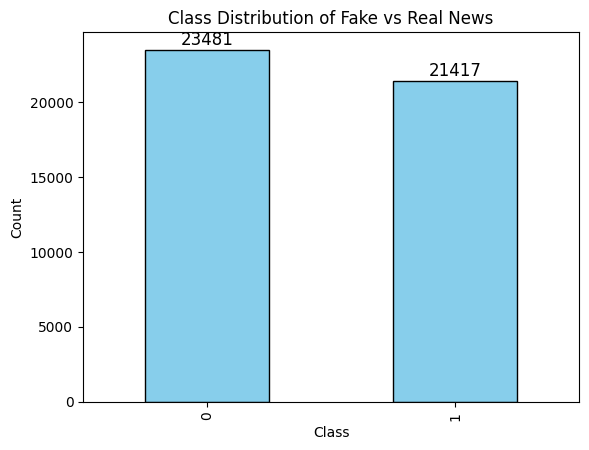

In [51]:
import matplotlib.pyplot as plt

# Create the bar plot
ax = df['class'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')

# Add the values on top of the bars
for i, v in enumerate(df['class'].value_counts()):
    ax.text(i, v + 50, str(v), ha='center', va='bottom', fontsize=12)  # Adjust the offset (50) if needed

# Show the plot
plt.title('Class Distribution of Fake vs Real News')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


### Word Cloud Visualization

Word clouds were generated to visualize the most frequent words in the dataset. A general word cloud was created for all cleaned text, followed by separate word clouds for fake news and real news. These visualizations help identify common linguistic patterns and thematic differences between the two classes.


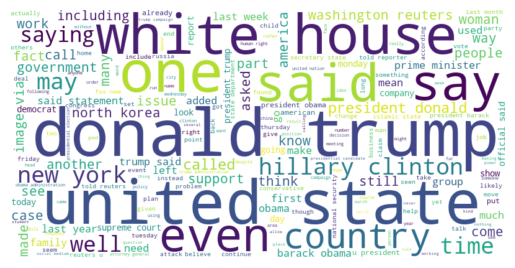

In [16]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['text_cleaned']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [17]:
fake_news = df[df['class'] == 0]
real_news = df[df['class'] == 1]
fake_wordcloud = WordCloud(width=800, height=400).generate(' '.join(fake_news['text_cleaned']))
real_wordcloud = WordCloud(width=800, height=400).generate(' '.join(real_news['text_cleaned']))


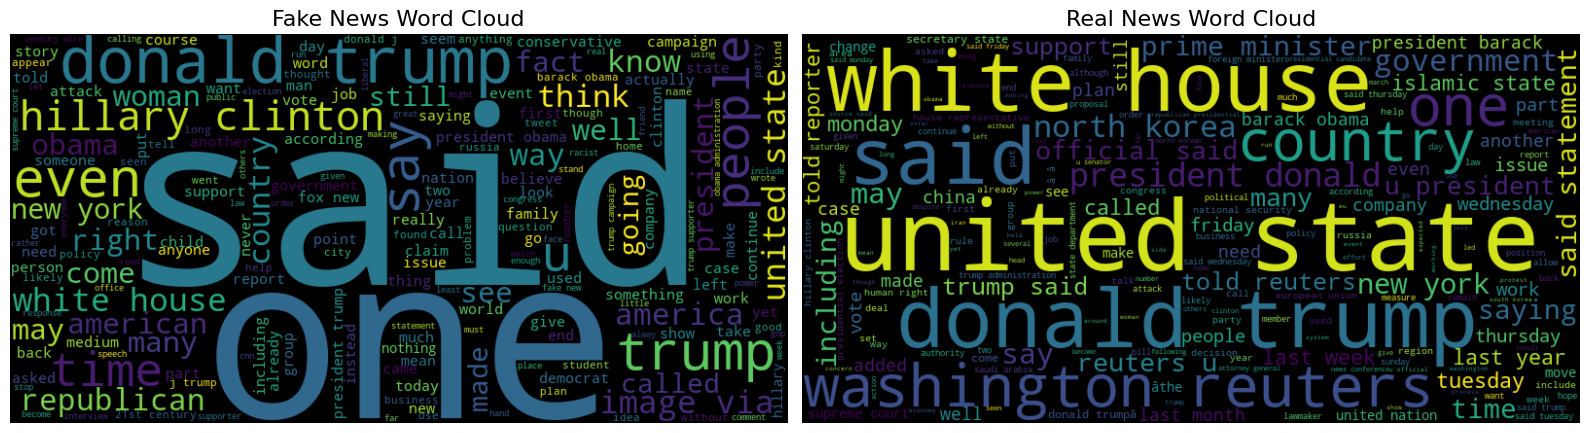

In [18]:
# Plotting the word clouds
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Fake News Word Cloud
axes[0].imshow(fake_wordcloud, interpolation='bilinear')
axes[0].axis('off')  # Turn off axis
axes[0].set_title('Fake News Word Cloud', fontsize=16)

# Real News Word Cloud
axes[1].imshow(real_wordcloud, interpolation='bilinear')
axes[1].axis('off')  # Turn off axis
axes[1].set_title('Real News Word Cloud', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


### Splitting Features and Target
In this step, we separate the dataset into features (`X`) and the target variable (`y`)


In [15]:
X = df["text_cleaned"]
y = df["class"]

In [16]:
y.value_counts()

class
0    23481
1    21417
Name: count, dtype: int64

### Train-Test Split
We split the dataset into training and testing subsets using `train_test_split` from `sklearn.model_selection`.


In [17]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Check the size of training and testing data
print(f"Training size: {len(X_train)}")
print(f"Testing size: {len(X_test)}")

Training size: 35918
Testing size: 8980


## Traditional Machine Learning Models for NLP

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, adjusted_rand_score

In [19]:
# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


### 1. Multinomial Naive Bayes Classification

A Multinomial Naive Bayes model was trained on TF-IDF vectorized text data for binary classification (fake vs real news). The model's performance was evaluated using accuracy, precision, recall, F1-score, ROC-AUC, and PR-AUC metrics. Visualizations such as the confusion matrix, ROC curve, and precision-recall curve were generated to assess model behavior and class separation.


In [57]:
# 1. Multinomial Naive Bayes for Text Classification
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, precision_recall_curve, auc, roc_curve, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
def evaluate_model(model, X_test_vec, y_test, model_name="Model"):
    y_pred = model.predict(X_test_vec)
    y_prob = model.predict_proba(X_test_vec)

    print(f"\n=== {model_name} Evaluation ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'{model_name} - Confusion Matrix')
    plt.show()

    if len(np.unique(y_test)) == 2:  # Binary classification
        roc_auc = roc_auc_score(y_test, y_prob[:, 1])
        print("ROC-AUC Score:", roc_auc)
        
        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model_name} - ROC Curve')
        plt.legend(loc="lower right")
        plt.show()

        # PR Curve
        precision, recall, _ = precision_recall_curve(y_test, y_prob[:, 1])
        pr_auc = auc(recall, precision)
        print("PR-AUC Score:", pr_auc)

        plt.figure()
        plt.plot(recall, precision, color='blue', lw=2, label='PR curve (area = %0.2f)' % pr_auc)
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'{model_name} - Precision-Recall Curve')
        plt.legend(loc="lower left")
        plt.show()



=== Multinomial Naive Bayes Evaluation ===
Accuracy: 0.9562360801781737

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      4739
           1       0.94      0.97      0.95      4241

    accuracy                           0.96      8980
   macro avg       0.96      0.96      0.96      8980
weighted avg       0.96      0.96      0.96      8980



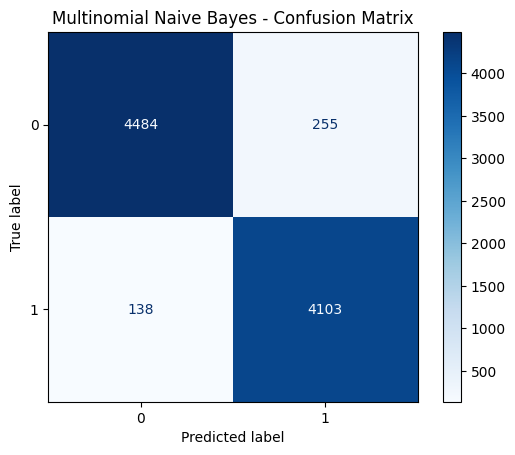

ROC-AUC Score: 0.9894583064796328


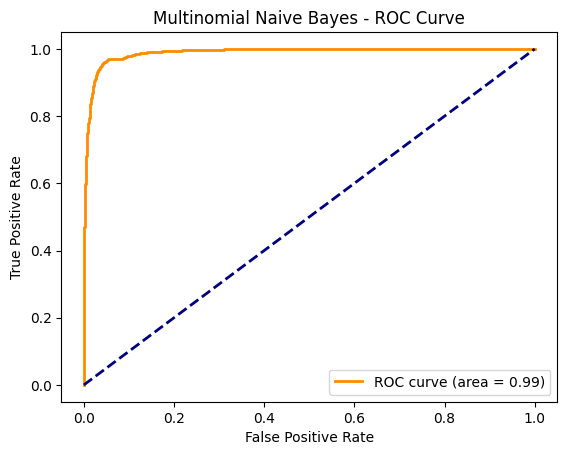

PR-AUC Score: 0.98696703671544


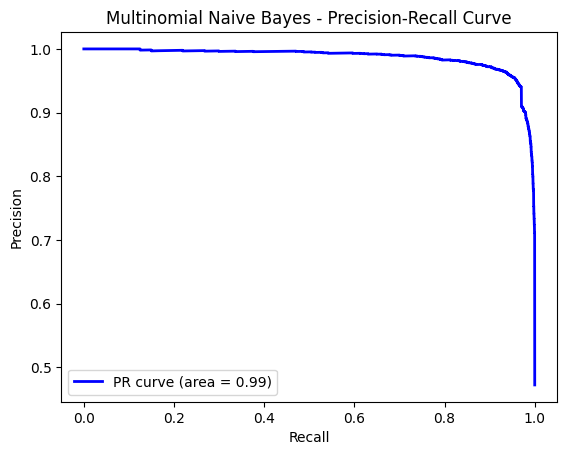

In [58]:
evaluate_model(nb_model, X_test_vec, y_test, model_name="Multinomial Naive Bayes")


 ### 2. Logistic Regression Classification

A Logistic Regression model was trained on the vectorized dataset for binary classification of fake vs real news. The model was evaluated using key metrics such as accuracy, precision, recall, F1-score, and ROC-AUC. Visual diagnostics included a confusion matrix, ROC curve, and classification report, providing insight into the model's performance and class discrimination ability.


In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
#rom sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize and fit Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_vec, y_train)


LogisticRegression(max_iter=1000)

In [61]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay,
    classification_report, roc_auc_score, roc_curve,
    precision_recall_curve, auc
)
import matplotlib.pyplot as plt

def evaluate_binary_vector_model(model, X_test_vec, y_test, model_name="Model"):
    print(f"\n=== {model_name} Evaluation ===")
    
    # Predict class labels and probabilities
    y_pred = model.predict(X_test_vec)
    y_prob = model.predict_proba(X_test_vec)[:, 1]

    # Basic metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy:  {accuracy:.3f}")
    print(f"Recall:    {recall:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"F1 Score:  {f1:.3f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'{model_name} - Confusion Matrix')
    plt.show()

    # ROC-AUC
    roc_auc = roc_auc_score(y_test, y_prob)
    print(f"ROC-AUC Score: {roc_auc:.3f}")
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    # PR-AUC
    precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(recall_vals, precision_vals)
    print(f"PR-AUC Score: {pr_auc:.3f}")
    plt.figure()
    plt.plot(recall_vals, precision_vals, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{model_name} - Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()



=== Logistic Regression Evaluation ===
Accuracy:  0.991
Recall:    0.991
Precision: 0.989
F1 Score:  0.990

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4739
           1       0.99      0.99      0.99      4241

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



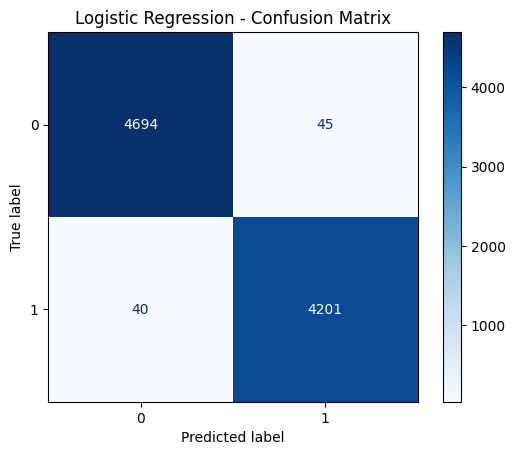

ROC-AUC Score: 0.999


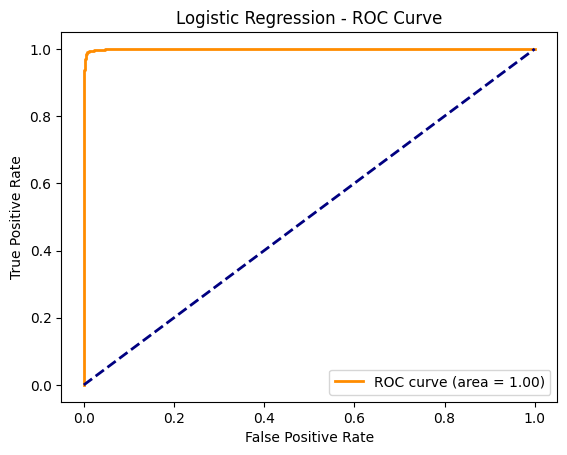

PR-AUC Score: 0.999


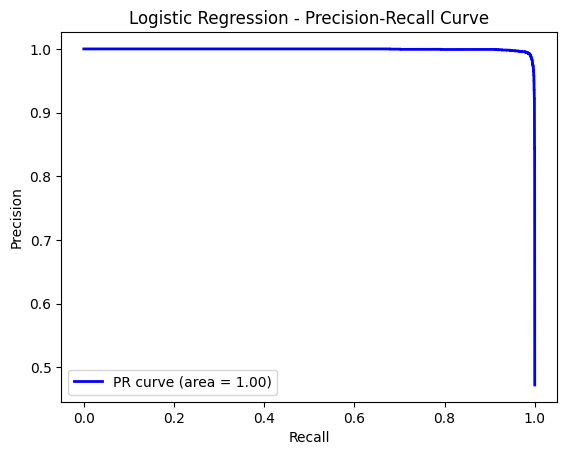

In [62]:
# 3. Run evaluation
evaluate_binary_vector_model(log_reg, X_test_vec, y_test, model_name="Logistic Regression")

### HYPERPARAMETER TUNING OF LOGISTIC REGRESSION MODEL

In [63]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],          # Inverse of regularization strength
    'penalty': ['l2'],               # L1 works only with liblinear solver
    'solver': ['lbfgs', 'saga'],     # 'saga' is faster on large datasets
    'max_iter': [500, 1000]
}

# Initialize Logistic Regression
log_reg = LogisticRegression()

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)
grid_search.fit(X_train_vec, y_train)

# Best model
best_log_reg = grid_search.best_estimator_
print("\nBest Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best Parameters: {'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga'}



=== Tuned Logistic Regression Evaluation ===
Accuracy:  0.995
Recall:    0.994
Precision: 0.995
F1 Score:  0.995

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      4739
           1       1.00      0.99      0.99      4241

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



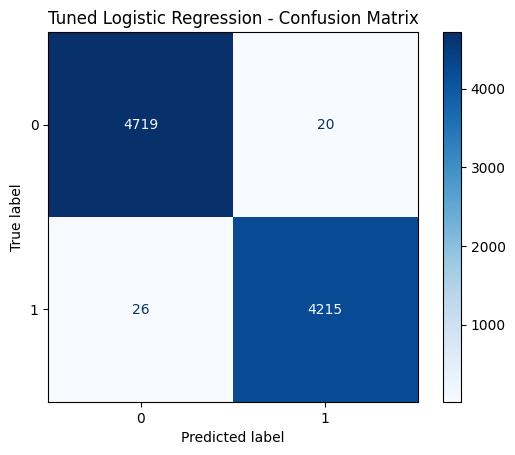

ROC-AUC Score: 1.000


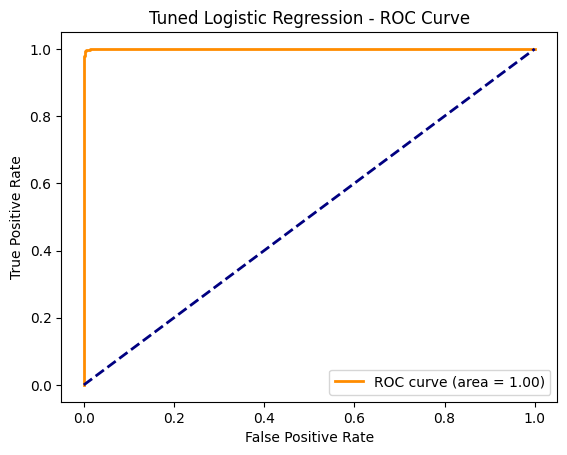

PR-AUC Score: 1.000


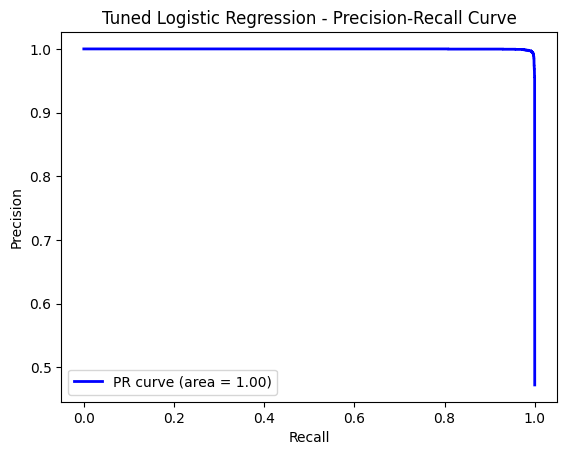

In [64]:
evaluate_binary_vector_model(best_log_reg, X_test_vec, y_test, model_name="Tuned Logistic Regression")



### 3. Random Forest Classification

A Random Forest model was trained using 100 estimators to classify news as fake or real. The model was evaluated on accuracy, precision, recall, F1-score, and ROC-AUC. Visual assessments included a confusion matrix, ROC curve, and precision-recall curve, highlighting the model’s capability in handling non-linear decision boundaries and feature importance in text classification.


In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=101)
rf_model.fit(X_train_vec, y_train)


RandomForestClassifier(random_state=101)


=== Random Forest Evaluation ===
Accuracy:  0.998
Recall:    0.999
Precision: 0.998
F1 Score:  0.998

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4739
           1       1.00      1.00      1.00      4241

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



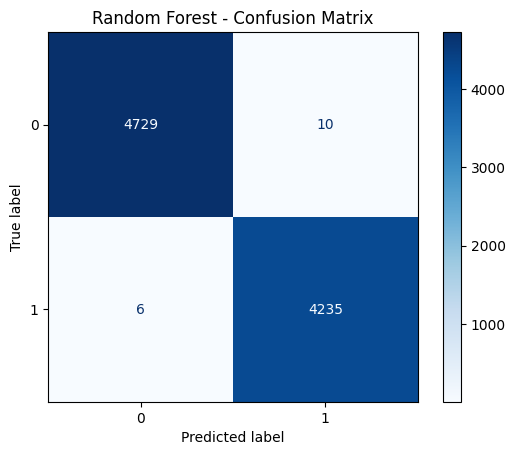

ROC-AUC Score: 1.000


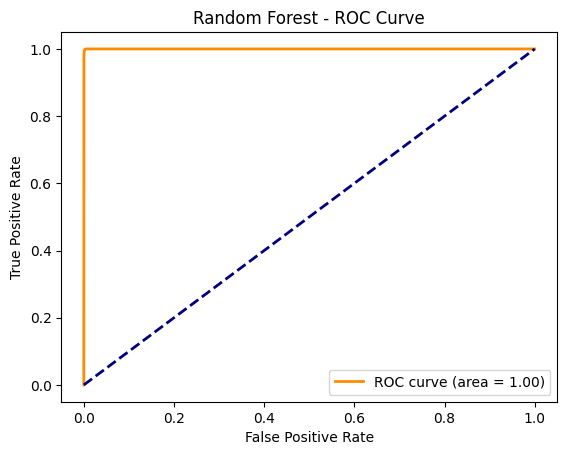

PR-AUC Score: 1.000


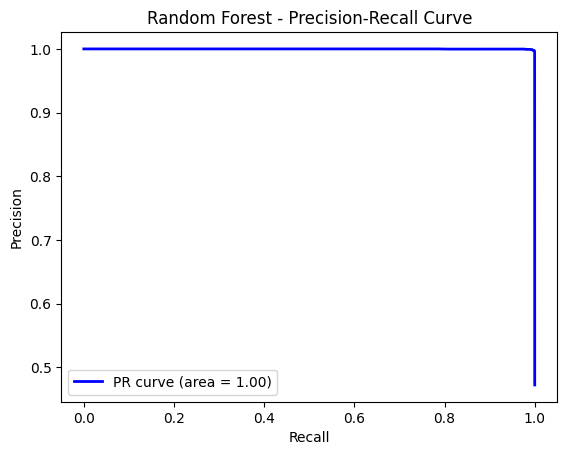

In [66]:
# 2. Define Evaluation Function (if not already defined)
def evaluate_binary_vector_model(model, X_test_vec, y_test, model_name="Model"):
    print(f"\n=== {model_name} Evaluation ===")

    # Predict class labels and probabilities
    y_pred = model.predict(X_test_vec)
    y_prob = model.predict_proba(X_test_vec)[:, 1]  # Probability for the positive class

    # Classification Metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy:  {accuracy:.3f}")
    print(f"Recall:    {recall:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"F1 Score:  {f1:.3f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'{model_name} - Confusion Matrix')
    plt.show()

    # ROC-AUC
    roc_auc = roc_auc_score(y_test, y_prob)
    print(f"ROC-AUC Score: {roc_auc:.3f}")
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    # PR-AUC
    precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(recall_vals, precision_vals)
    print(f"PR-AUC Score: {pr_auc:.3f}")
    plt.figure()
    plt.plot(recall_vals, precision_vals, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{model_name} - Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()

# 3. Run evaluation
evaluate_binary_vector_model(rf_model, X_test_vec, y_test, model_name="Random Forest")


In [67]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X_train_vec, y_train, cv=5, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy: {:.4f}".format(cv_scores.mean()))


Cross-validation scores: [0.99749443 0.99777283 0.99791203 0.99735487 0.99846861]
Mean CV accuracy: 0.9978


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 487}

=== Tuned Random Forest (Randomized Search) Evaluation ===
Accuracy:  0.998
Recall:    0.999
Precision: 0.996
F1 Score:  0.998

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4739
           1       1.00      1.00      1.00      4241

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



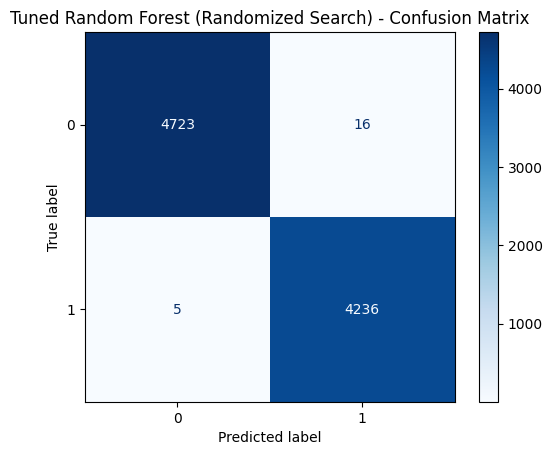

ROC-AUC Score: 1.000


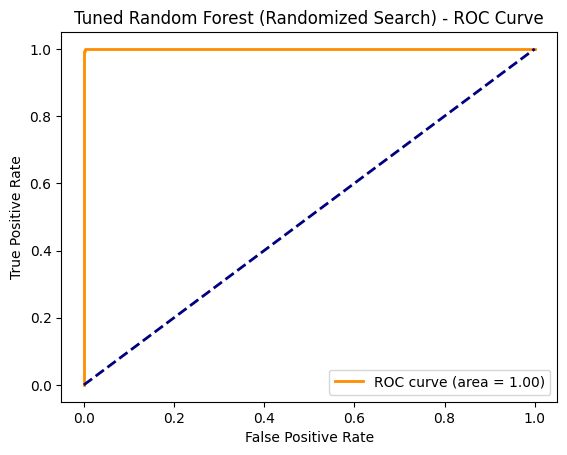

PR-AUC Score: 1.000


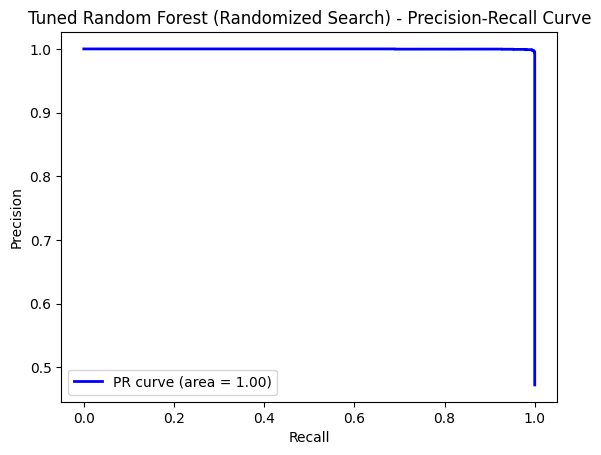

In [68]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define parameter distribution
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None, 10, 20, 50],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

# Create base model
rf = RandomForestClassifier(random_state=101)

# Randomized search with 20 iterations
random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit the randomized search
random_search_rf.fit(X_train_vec, y_train)

# Show best parameters
print("Best Parameters:", random_search_rf.best_params_)

# Evaluate best model
best_rf = random_search_rf.best_estimator_
evaluate_binary_vector_model(best_rf, X_test_vec, y_test, model_name="Tuned Random Forest (Randomized Search)")


## Deep Learning Models for NLP

### LSTM-based model

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import numpy as np

### Tokenization and Padding for Deep Learning

Text data was preprocessed using Keras' `Tokenizer` with a vocabulary size limit of 10,000 and an out-of-vocabulary token. Sequences were padded or truncated to a fixed length of 200 tokens to ensure consistent input shape for deep learning models. This prepared the training and testing datasets for embedding-based architectures such as LSTM and CNN.


In [21]:
max_words = 10000
max_len = 200
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

y_train_dl = np.array(y_train)
y_test_dl = np.array(y_test)

### 5. LSTM Model for Text Classification

A Long Short-Term Memory (LSTM) model was built for binary text classification. The model includes an embedding layer, followed by an LSTM layer with 64 units and a dropout layer to prevent overfitting. A dense layer with a sigmoid activation was used for binary classification. The model was trained using binary cross-entropy loss and Adam optimizer over 5 epochs, with validation on the test set.


In [29]:
# Tokenization and padding for LSTM



lstm_model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Explicitly build the model (optional but avoids "unbuilt" issues)
lstm_model.build(input_shape=(None, max_len))
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.summary()


# Train the LSTM model
history = lstm_model.fit(
    X_train_pad, y_train_dl,
    epochs=5,
    batch_size=128,
    validation_data=(X_test_pad, y_test_dl)
)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 200, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,329,473 (5.07 MB)

 Trainable params: 1,329,473 (5.07 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
281/281 ━━━━━━━━━━━━━━━━━━━━ 49s 167ms/step - accuracy: 0.7537 - loss: 0.4966 - val_accuracy: 0.9120 - val_loss: 0.2859
Epoch 2/5
281/281 ━━━━━━━━━━━━━━━━━━━━ 81s 165ms/step - accuracy: 0.9292 - loss: 0.2447 - val_accuracy: 0.9207 - val_loss: 0.2650
Epoch 3/5
281/281 ━━━━━━━━━━━━━━━━━━━━ 82s 165ms/step - accuracy: 0.9530 - loss: 0.1634 - val_accuracy: 0.9421 - val_loss: 0.1924
Epoch 4/5
281/281 ━━━━━━━━━━━━━━━━━━━━ 83s 168ms/step - accuracy: 0.9566 - loss: 0.1556 - val_accuracy: 0.9478 - val_loss: 0.1773
Epoch 5/5
281/281 ━━━━━━━━━━━━━━━━━━━━ 82s 167ms/step - accuracy: 0.9675 - loss: 0.1241 - val_accuracy: 0.9733 - val_loss: 0.1398


In [27]:
# Evaluate the LSTM model
loss, accuracy = lstm_model.evaluate(X_test_pad, y_test_dl)
print(f"LSTM Test Accuracy: {accuracy:.4f}")

281/281 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.9448 - loss: 0.1601
LSTM Test Accuracy: 0.9459


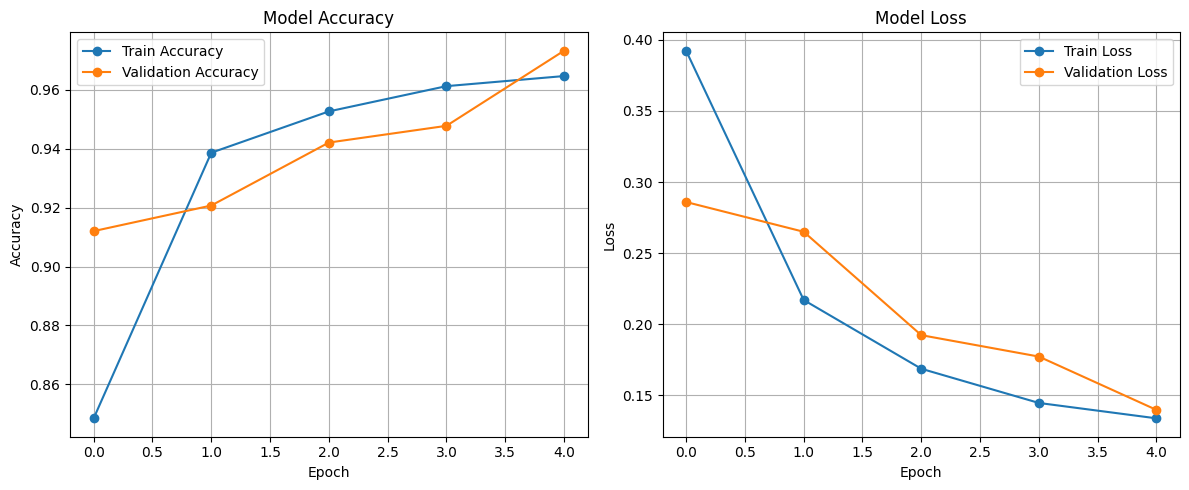

In [30]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### LSTM HYPERPARAMETER FINE TUNING

In [31]:
from tensorflow.keras.optimizers import Adam

# Example: smaller LSTM, lower learning rate
lstm_model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    LSTM(128, dropout=0.3, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=0.0005)
lstm_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = lstm_model.fit(
    X_train_pad, y_train_dl,
    epochs=5,
    batch_size=64,
    validation_data=(X_test_pad, y_test_dl)
)


Epoch 1/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 122s 213ms/step - accuracy: 0.7366 - loss: 0.5023 - val_accuracy: 0.8530 - val_loss: 0.3169
Epoch 2/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 134s 198ms/step - accuracy: 0.8612 - loss: 0.3161 - val_accuracy: 0.9199 - val_loss: 0.2665
Epoch 3/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 146s 205ms/step - accuracy: 0.9202 - loss: 0.2340 - val_accuracy: 0.9722 - val_loss: 0.1115
Epoch 4/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 114s 204ms/step - accuracy: 0.9671 - loss: 0.1254 - val_accuracy: 0.9619 - val_loss: 0.1497
Epoch 5/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 142s 204ms/step - accuracy: 0.9599 - loss: 0.1284 - val_accuracy: 0.9910 - val_loss: 0.0409


In [34]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_and_plot(model, X_test, y_test, history):
    """
    Function to evaluate the LSTM model and plot the results.
    
    Parameters:
    - model: Trained Keras model.
    - X_test: Test data.
    - y_test: True labels for test data.
    - history: Training history object from the model.
    """
    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Test Loss: {test_loss:.4f}")
    
    # Generate predictions
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    
    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['False', 'True'], yticklabels=['False', 'True'])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    # Plot accuracy and loss
    plt.figure(figsize=(12, 6))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()


281/281 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.9888 - loss: 0.0495
Test Accuracy: 0.9910
Test Loss: 0.0409
281/281 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4739
           1       0.99      0.99      0.99      4241

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



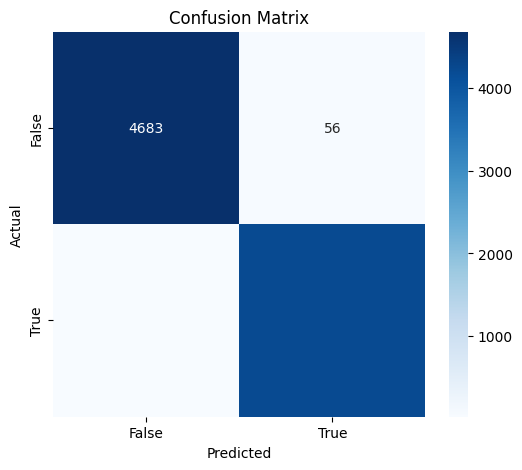

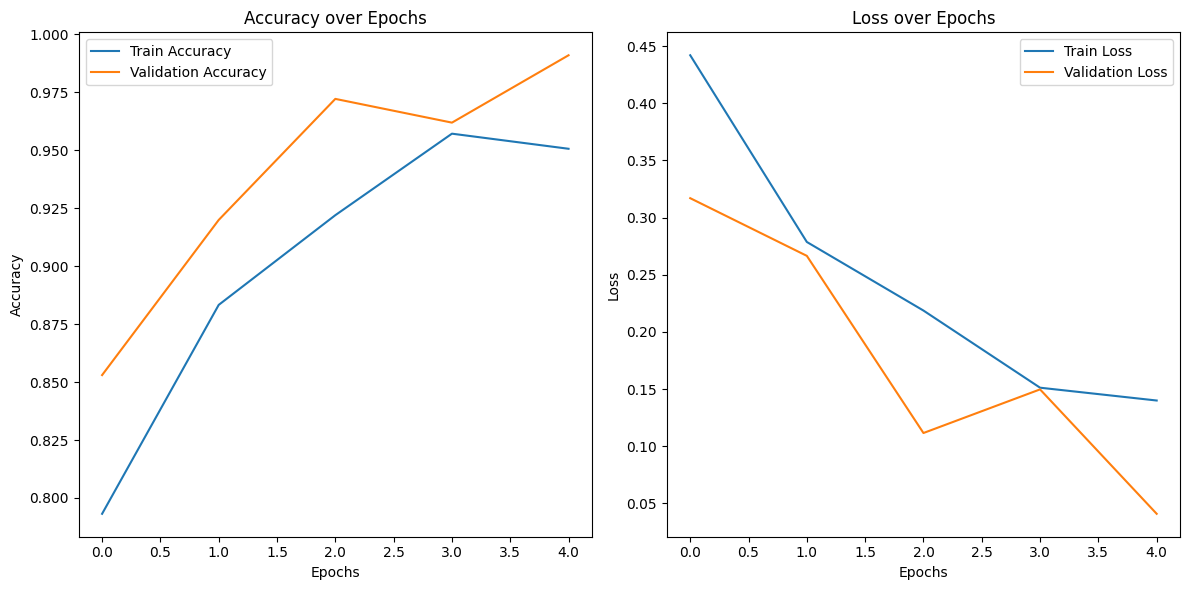

In [35]:
evaluate_and_plot(lstm_model, X_test_pad, y_test_dl, history)


### Transformer-based model
### 6. BERT Model for Text Classification

A BERT (Bidirectional Encoder Representations from Transformers) model was implemented for binary text classification. The following steps were involved:

- **Tokenization**: The text was tokenized using the pre-trained `bert-base-uncased` tokenizer. The texts were encoded into token IDs, and attention masks were generated. The maximum sequence length was set to 64 for faster processing.
- **Model**: A `TFBertForSequenceClassification` model was used, with a final dense layer for binary classification (`num_labels=2`).
- **Optimizer**: The optimizer was created using the `create_optimizer` function from HuggingFace Transformers, with a learning rate of `2e-5` and 2 epochs for training.
- **Training**: The model was trained for 3 epochs with a batch size of 8 using binary cross-entropy loss, and it was validated on a subset of the test set.

The model was evaluated on a reduced dataset (2000 training samples and 500 test samples) for faster iteration and testing.


In [22]:
from transformers import create_optimizer, BertTokenizer, TFBertForSequenceClassification
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import numpy as np

# Load tokenizer
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenization function
def bert_encode(texts, tokenizer, max_len=64):  # Reduced max_len
    input_ids, attention_masks = [], []
    for text in texts:
        encoded = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=max_len,  # Reduced sequence length
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='np'
        )
        input_ids.append(encoded['input_ids'][0])
        attention_masks.append(encoded['attention_mask'][0])
    return np.array(input_ids), np.array(attention_masks)

# Prepare data (using smaller subset for faster testing)
# Adjust to 4000 samples for better learning
X_train_bert, X_train_mask = bert_encode(X_train[:2000], bert_tokenizer)
X_test_bert, X_test_mask = bert_encode(X_test[:500], bert_tokenizer)  # Keep the test set the same
y_train_bert = np.array(y_train[:2000])
y_test_bert = np.array(y_test[:500])
# Load BERT model
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Create HuggingFace optimizer
steps_per_epoch = len(X_train_bert) // 8
num_train_steps = steps_per_epoch * 2  # 2 epochs

optimizer, _ = create_optimizer(init_lr=2e-5, num_train_steps=num_train_steps, num_warmup_steps=0)

# Compile model
loss = SparseCategoricalCrossentropy(from_logits=True)
bert_model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# Train the model with 5 epochs for better learning
bert_model.fit(
    [X_train_bert, X_train_mask], y_train_bert,
    epochs=3,  # More epochs for better learning
    batch_size=8,  # Batch size of 8
    validation_data=([X_test_bert, X_test_mask], y_test_bert)
)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
250/250 [==============================] - 569s 2s/step - loss: 0.1189 - accuracy: 0.9600 - val_loss: 0.0285 - val_accuracy: 0.9960
Epoch 2/3
250/250 [==============================] - 658s 3s/step - loss: 0.0128 - accuracy: 0.9975 - val_loss: 0.0292 - val_accuracy: 0.9960
Epoch 3/3
250/250 [==============================] - 741s 3s/step - loss: 0.0056 - accuracy: 0.9990 - val_loss: 0.0292 - val_accuracy: 0.9960


16/16 [==============================] - 58s 3s/step
Accuracy: 0.996

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       263
           1       0.99      1.00      1.00       237

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



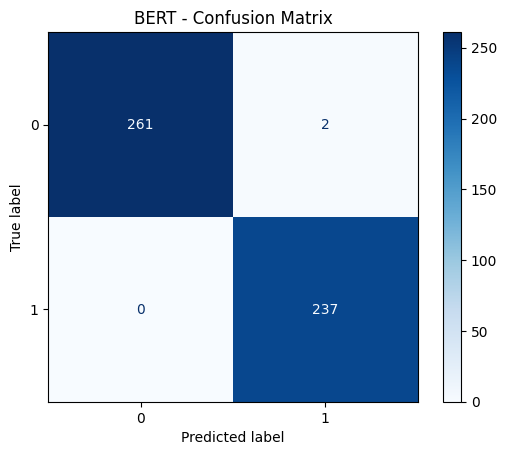

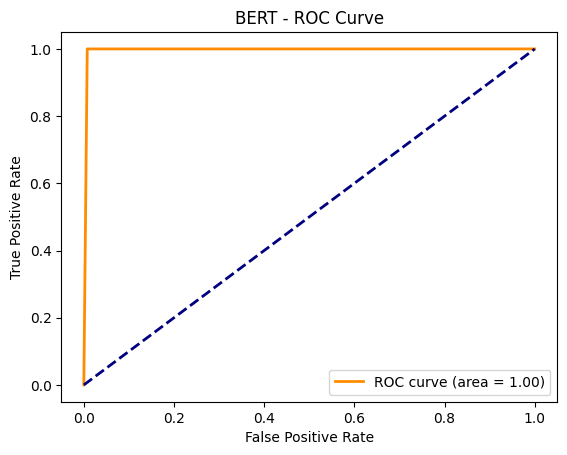

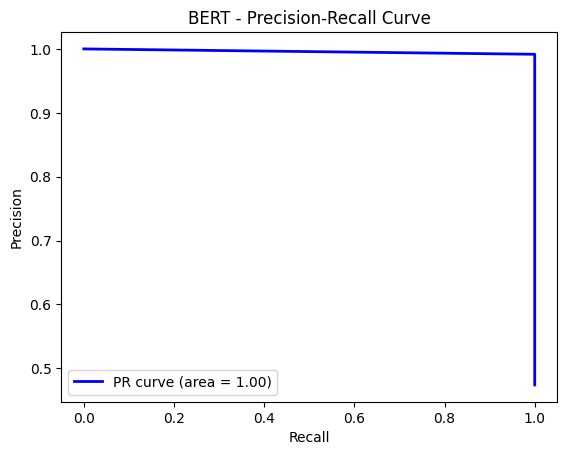

ROC-AUC: 0.996
PR-AUC: 0.996


In [23]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

# Evaluate BERT model predictions
y_pred_bert = np.argmax(bert_model.predict([X_test_bert, X_test_mask])[0], axis=1)

# Accuracy
accuracy = accuracy_score(y_test_bert, y_pred_bert)
print(f"Accuracy: {accuracy:.3f}")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test_bert, y_pred_bert))

# Confusion Matrix
cm = confusion_matrix(y_test_bert, y_pred_bert)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('BERT - Confusion Matrix')
plt.show()

# ROC-AUC
roc_auc = roc_auc_score(y_test_bert, y_pred_bert)
fpr, tpr, _ = roc_curve(y_test_bert, y_pred_bert)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('BERT - ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test_bert, y_pred_bert)
pr_auc = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('BERT - Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Print ROC-AUC and PR-AUC scores
print(f"ROC-AUC: {roc_auc:.3f}")
print(f"PR-AUC: {pr_auc:.3f}")


### HYPERPARAMETER TUNING

In [25]:
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from transformers import TFBertForSequenceClassification, BertTokenizer

# Load tokenizer
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenization function
def bert_encode(texts, tokenizer, max_len=64):
    input_ids, attention_masks = [], []
    for text in texts:
        encoded = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=max_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='np'
        )
        input_ids.append(encoded['input_ids'][0])
        attention_masks.append(encoded['attention_mask'][0])
    return np.array(input_ids), np.array(attention_masks)

# Prepare data (using a smaller subset for faster testing)
X_train_bert, X_train_mask = bert_encode(X_train[:2000], bert_tokenizer)
X_test_bert, X_test_mask = bert_encode(X_test[:500], bert_tokenizer)
y_train_bert = np.array(y_train[:2000])
y_test_bert = np.array(y_test[:500])

# Define the hyperparameters to tune
learning_rates = [1e-5, 2e-5, 3e-5]
batch_sizes = [8, 16]
best_score = 0
best_params = {}

# Grid search loop over learning rate and batch size
for lr in learning_rates:
    for batch_size in batch_sizes:
        # Load the BERT model
        bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

        # Define the optimizer
        steps_per_epoch = len(X_train_bert) // batch_size
        num_train_steps = steps_per_epoch * 2  # 2 epochs

        optimizer, _ = create_optimizer(init_lr=lr, num_train_steps=num_train_steps, num_warmup_steps=0)

        # Compile the model
        loss = SparseCategoricalCrossentropy(from_logits=True)
        bert_model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

        # Train the model
        print(f"Training with learning_rate={lr}, batch_size={batch_size}")
        history = bert_model.fit(
            [X_train_bert, X_train_mask], y_train_bert,
            epochs=3,
            batch_size=batch_size,
            validation_data=([X_test_bert, X_test_mask], y_test_bert)
        )

        # Get validation accuracy
        val_accuracy = history.history['val_accuracy'][-1]
        print(f"Validation accuracy: {val_accuracy:.4f}")

        # Update best model if necessary
        if val_accuracy > best_score:
            best_score = val_accuracy
            best_params = {'learning_rate': lr, 'batch_size': batch_size}

# Print the best hyperparameters and validation accuracy
print(f"\nBest Hyperparameters: {best_params}")
print(f"Best Validation Accuracy: {best_score:.4f}")


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Training with learning_rate=1e-05, batch_size=8
Epoch 1/3
250/250 [==============================] - 657s 3s/step - loss: 0.1352 - accuracy: 0.9590 - val_loss: 0.0304 - val_accuracy: 0.9960
Epoch 2/3
250/250 [==============================] - 216s 865ms/step - loss: 0.0144 - accuracy: 0.9975 - val_loss: 0.0276 - val_accuracy: 0.9960
Epoch 3/3
250/250 [==============================] - 221s 884ms/step - loss: 0.0085 - accuracy: 0.9985 - val_loss: 0.0276 - val_accuracy: 0.9960
Validation accuracy: 0.9960


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Training with learning_rate=1e-05, batch_size=16
Epoch 1/3
125/125 [==============================] - 199s 2s/step - loss: 0.1992 - accuracy: 0.9390 - val_loss: 0.0405 - val_accuracy: 0.9920
Epoch 2/3
125/125 [==============================] - 187s 1s/step - loss: 0.0217 - accuracy: 0.9980 - val_loss: 0.0279 - val_accuracy: 0.9960
Epoch 3/3
125/125 [==============================] - 189s 2s/step - loss: 0.0197 - accuracy: 0.9975 - val_loss: 0.0279 - val_accuracy: 0.9960
Validation accuracy: 0.9960


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Training with learning_rate=2e-05, batch_size=8
Epoch 1/3
250/250 [==============================] - 223s 851ms/step - loss: 0.0838 - accuracy: 0.9770 - val_loss: 0.0457 - val_accuracy: 0.9920
Epoch 2/3
250/250 [==============================] - 445s 2s/step - loss: 0.0090 - accuracy: 0.9980 - val_loss: 0.0274 - val_accuracy: 0.9960
Epoch 3/3
250/250 [==============================] - 730s 3s/step - loss: 0.0063 - accuracy: 0.9990 - val_loss: 0.0274 - val_accuracy: 0.9960
Validation accuracy: 0.9960


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Training with learning_rate=2e-05, batch_size=16
Epoch 1/3
125/125 [==============================] - 723s 6s/step - loss: 0.1485 - accuracy: 0.9530 - val_loss: 0.0262 - val_accuracy: 0.9960
Epoch 2/3
125/125 [==============================] - 706s 6s/step - loss: 0.0132 - accuracy: 0.9980 - val_loss: 0.0282 - val_accuracy: 0.9960
Epoch 3/3
125/125 [==============================] - 695s 6s/step - loss: 0.0106 - accuracy: 0.9980 - val_loss: 0.0282 - val_accuracy: 0.9960
Validation accuracy: 0.9960


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Training with learning_rate=3e-05, batch_size=8
Epoch 1/3
250/250 [==============================] - 802s 3s/step - loss: 0.1150 - accuracy: 0.9590 - val_loss: 0.0356 - val_accuracy: 0.9940
Epoch 2/3
250/250 [==============================] - 773s 3s/step - loss: 0.0168 - accuracy: 0.9965 - val_loss: 0.0325 - val_accuracy: 0.9940
Epoch 3/3
250/250 [==============================] - 771s 3s/step - loss: 0.0114 - accuracy: 0.9970 - val_loss: 0.0325 - val_accuracy: 0.9940
Validation accuracy: 0.9940


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Training with learning_rate=3e-05, batch_size=16
Epoch 1/3
125/125 [==============================] - 792s 6s/step - loss: 0.1068 - accuracy: 0.9670 - val_loss: 0.0265 - val_accuracy: 0.9940
Epoch 2/3
125/125 [==============================] - 768s 6s/step - loss: 0.0118 - accuracy: 0.9965 - val_loss: 0.0264 - val_accuracy: 0.9960
Epoch 3/3
125/125 [==============================] - 764s 6s/step - loss: 0.0075 - accuracy: 0.9995 - val_loss: 0.0264 - val_accuracy: 0.9960
Validation accuracy: 0.9960

Best Hyperparameters: {'learning_rate': 1e-05, 'batch_size': 8}
Best Validation Accuracy: 0.9960


16/16 [==============================] - 62s 4s/step - loss: 0.0264 - accuracy: 0.9960
Test Accuracy: 0.9960
Test Loss: 0.0264
16/16 [==============================] - 65s 4s/step

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       263
           1       0.99      1.00      1.00       237

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



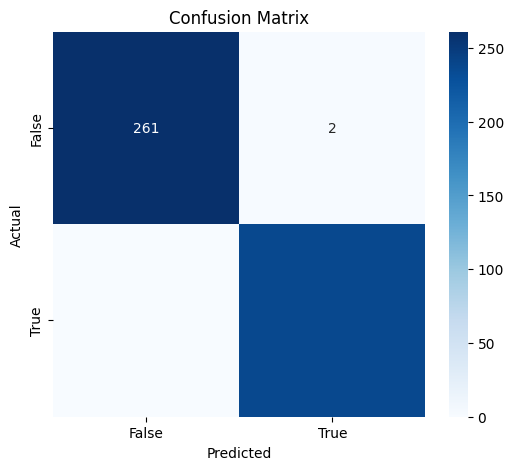

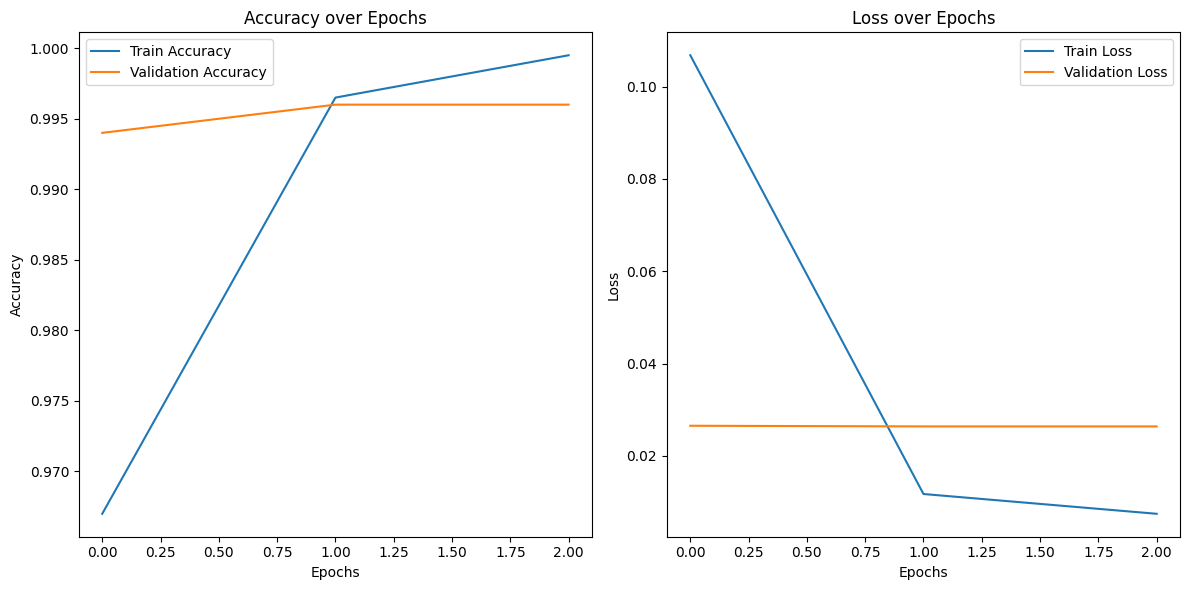

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def evaluate_and_plot_bert(model, X_test, y_test, history):
    """
    Function to evaluate the BERT model and plot the results.
    
    Parameters:
    - model: Trained BERT model.
    - X_test: Test data.
    - y_test: True labels for test data.
    - history: Training history object from the model.
    """
    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate([X_test[0], X_test[1]], y_test)
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Test Loss: {test_loss:.4f}")
    
    # Generate predictions
    y_pred_logits = model.predict([X_test[0], X_test[1]])[0]  # Extract logits
    y_pred = np.argmax(y_pred_logits, axis=-1)  # Get the class with the highest logit value
    
    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['False', 'True'], yticklabels=['False', 'True'])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    # Plot accuracy and loss
    plt.figure(figsize=(12, 6))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Example usage (assuming you have trained `bert_model` and have `X_test`, `y_test`, and `history`):
evaluate_and_plot_bert(bert_model, [X_test_bert, X_test_mask], y_test_bert, history)
